In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import gym
import matplotlib.pyplot as plt

# Adding local core library
sys.path.insert(0, '../../')

from core import utilities
from core.wrappers.augmentation import Augmentation

In [2]:
def make_grid(env: gym.Env, n_samples=16, size=None, delay=1, name='Result'):
    states = [env.reset()]
    for _ in range(n_samples - 1):
        state, reward, done, info = env.step(env.action_space.sample())
        states.append(state.copy())
        if done: env.reset()

    result = utilities.stack_images(images=states, size=size)
    print('*' * 100, f"\n\n{name}\n")
    
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(result)
    ax.axis('off')
    plt.show()
    
    return result


**************************************************************************************************** 

Augmentation: crop



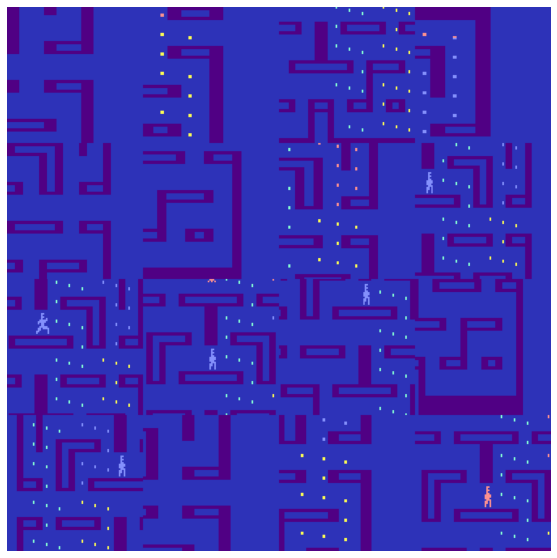

**************************************************************************************************** 

Augmentation: flip



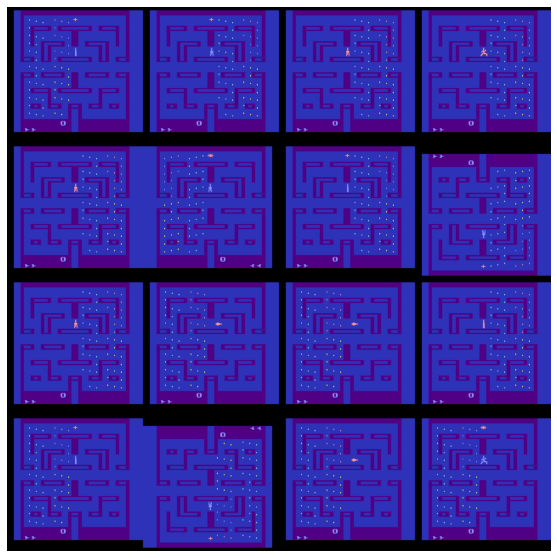

**************************************************************************************************** 

Augmentation: cutout



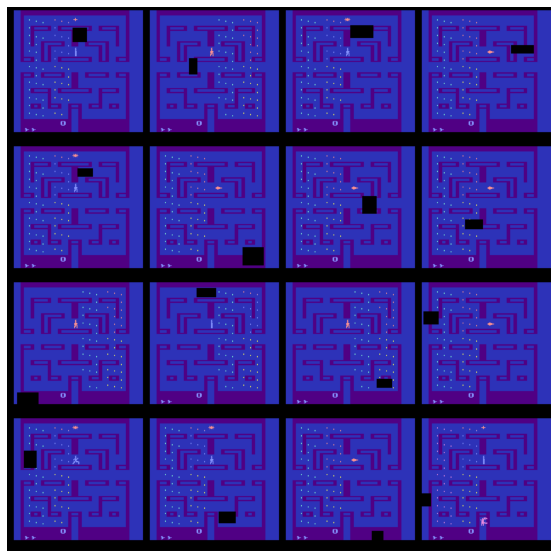

**************************************************************************************************** 

Augmentation: cutout_color



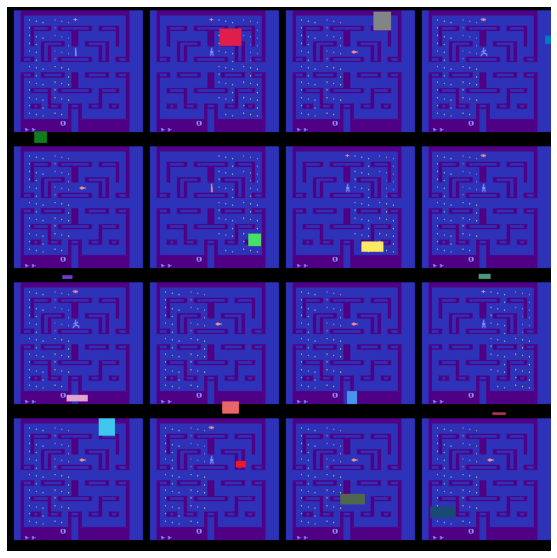

**************************************************************************************************** 

Augmentation: color_jitter



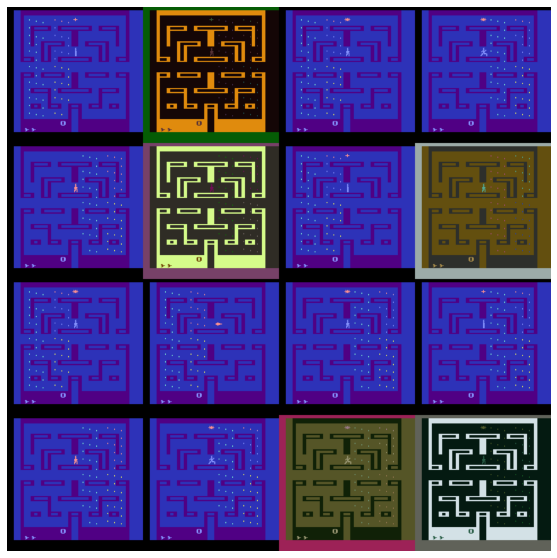

**************************************************************************************************** 

Augmentation: translate



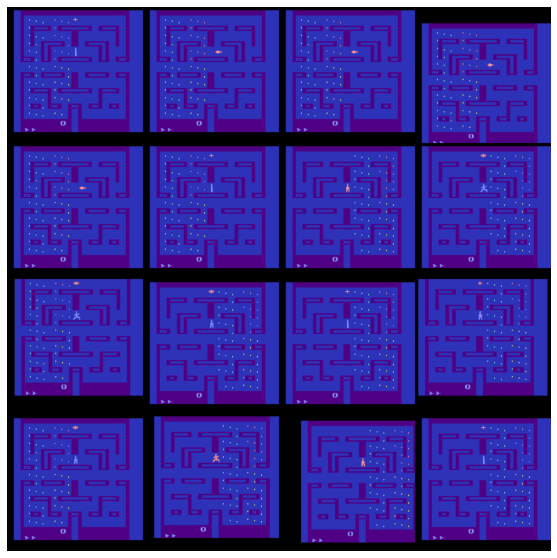

**************************************************************************************************** 

Augmentation: gray



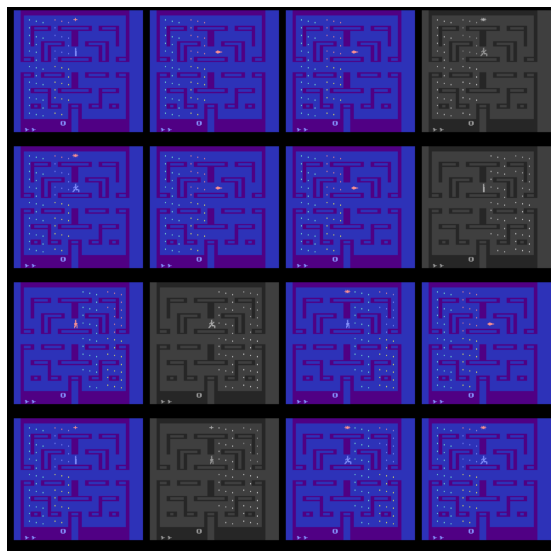

**************************************************************************************************** 

Augmentation: ['gray', 'flip']



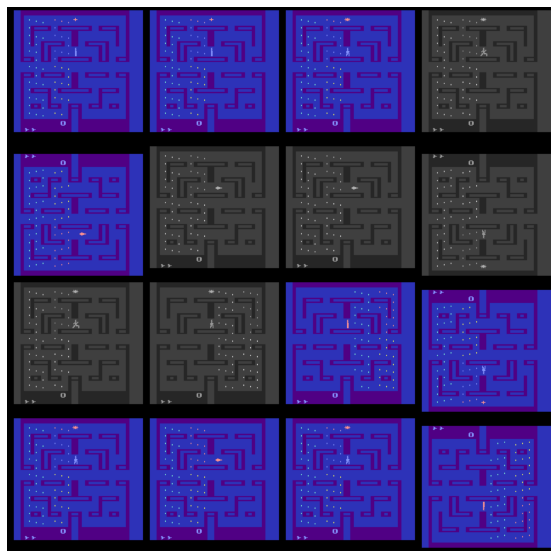

**************************************************************************************************** 

Augmentation: ['crop', 'flip', 'cutout', 'cutout_color', 'color_jitter', 'translate', 'gray']



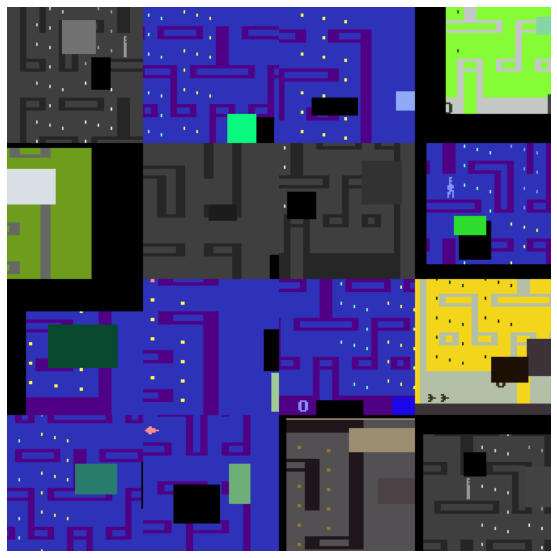

In [3]:
# env = gym.make('CatchRandom-20-20-v2')
env = gym.make('Alien-v0')

for augmentation in [
    'crop',
    'flip',
    'cutout',
    'cutout_color',
    'color_jitter',
    'translate',
    'gray',
    ['gray', 'flip'],
    ['crop', 'flip', 'cutout', 'cutout_color', 'color_jitter', 'translate', 'gray']
]:
    venv = Augmentation(
            env=env,
            crop=84,
            gray_p=.3,
            flip_p=.2,
            rotation_p=.3,
            cutout=(10, 30),
            cutout_value=0,
            cutout_color=(10, 30),
            color_jitter=dict(p=.3, hue=(0, 255), saturation=(0, 255), value=(0, 255)),
            translate=dict(p=.3, dx=(-20, 20), dy=(-20, 20)),
            order=[augmentation] if isinstance(augmentation, str) else augmentation,
    )

    make_grid(venv, size=(500, 500), delay=0, name=f"Augmentation: {augmentation}")


## Testing on Catch

**************************************************************************************************** 

Augmentation: ['crop', 'flip', 'cutout', 'cutout_color', 'color_jitter', 'translate', 'gray']



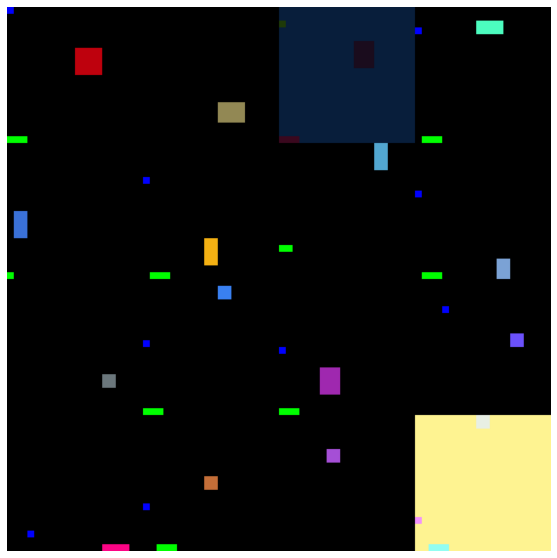

In [4]:
env = gym.make('CatchRandom-20-20-v2')

venv = Augmentation(
            env=env,
            crop=84,
            gray_p=.3,
            flip_p=.2,
            rotation_p=.3,
            cutout=(2, 5),
            cutout_value=0,
            cutout_color=(2, 5),
            color_jitter=dict(p=.3, hue=(0, 255), saturation=(0, 255), value=(0, 255)),
            translate=dict(p=.3, dx=(-5, 5), dy=(-5, 5)),
            order=['rotation', 'cutout', 'cutout_color', 'color_jitter', 'translate'],
    )

make_grid(venv, size=(500, 500), name=f"Augmentation: {augmentation}");